In [68]:
import pandas as pd
import seaborn as sns
sns.set_theme()
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS

In [5]:
df_original = pd.read_excel("publish\data\P1-Golden.xlsx")

In [6]:
df_augmented = pd.read_csv("data/balanced_augmentation_dataset.csv")

In [7]:
df_original.head()

,reviews,Judgement
0,Well done Microsoft!! OneNote is a fantastic p...,1
1,This works on a limited basis. Works well for...,1
2,This app was great for the first month or two....,1
3,I can't update it in my phone it takes way too...,1
4,Why is it so big?!!,1


In [13]:
df_augmented.rename(columns={"Useful?":"Judgement", "Reviews":"reviews"}, inplace=True)

In [19]:
df_combined = pd.concat([df_original, df_augmented])
df_combined.sample(5)

,reviews,Judgement,Labeler,Comments,Original_type
1614,Update it pains me to say Star Walk is superio...,1,NaN,NaN,"Dep,Usa"
1346,First I want to say I love using this app. Cr...,1,NaN,NaN,Usa
524,Everything I've wanted in a twitter app. Easy ...,1,NaN,NaN,NaN
458,Hell Ive even got some pictures of the Bible i...,0,Romario,NaN,mis
1150,"Fast, pretty accurate and easier to use than o...",1,NaN,NaN,Usa


In [22]:
useful = df_combined[df_combined.Judgement==1]
useless= df_combined[df_combined.Judgement==0]

# Length (# of words) distribution

Text(0.5, 1.0, 'Review length distribution for useful reviews')

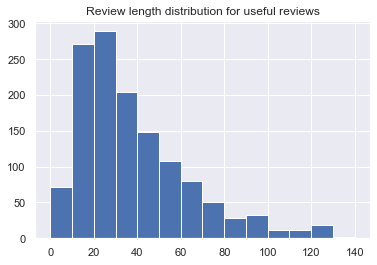

In [37]:
useful.reviews.apply(lambda x: len(word_tokenize(x))).hist(bins=[i for i in range(0,150, 10)])
plt.title("Review length distribution for useful reviews")

Text(0.5, 1.0, 'Review length distribution for useless reviews')

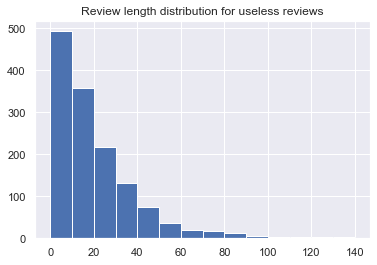

In [38]:
useless.reviews.apply(lambda x: len(word_tokenize(x))).hist(bins=[i for i in range(0,150, 10)])
plt.title("Review length distribution for useless reviews")

# Word Cloud

In [49]:
def generate_word_cloud(df):
    review_words = []
    for review in df.reviews:
        review_words += word_tokenize(review)

    review_words = [word.lower() for word in review_words]
    review_words = " ".join(review_words)
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = set(STOPWORDS),
                    min_font_size = 10).generate(review_words)

    plt.figure(figsize = (28,28))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Word Cloud for sld ", fontsize=13)
    plt.show()

## Useful reviews word cloud:

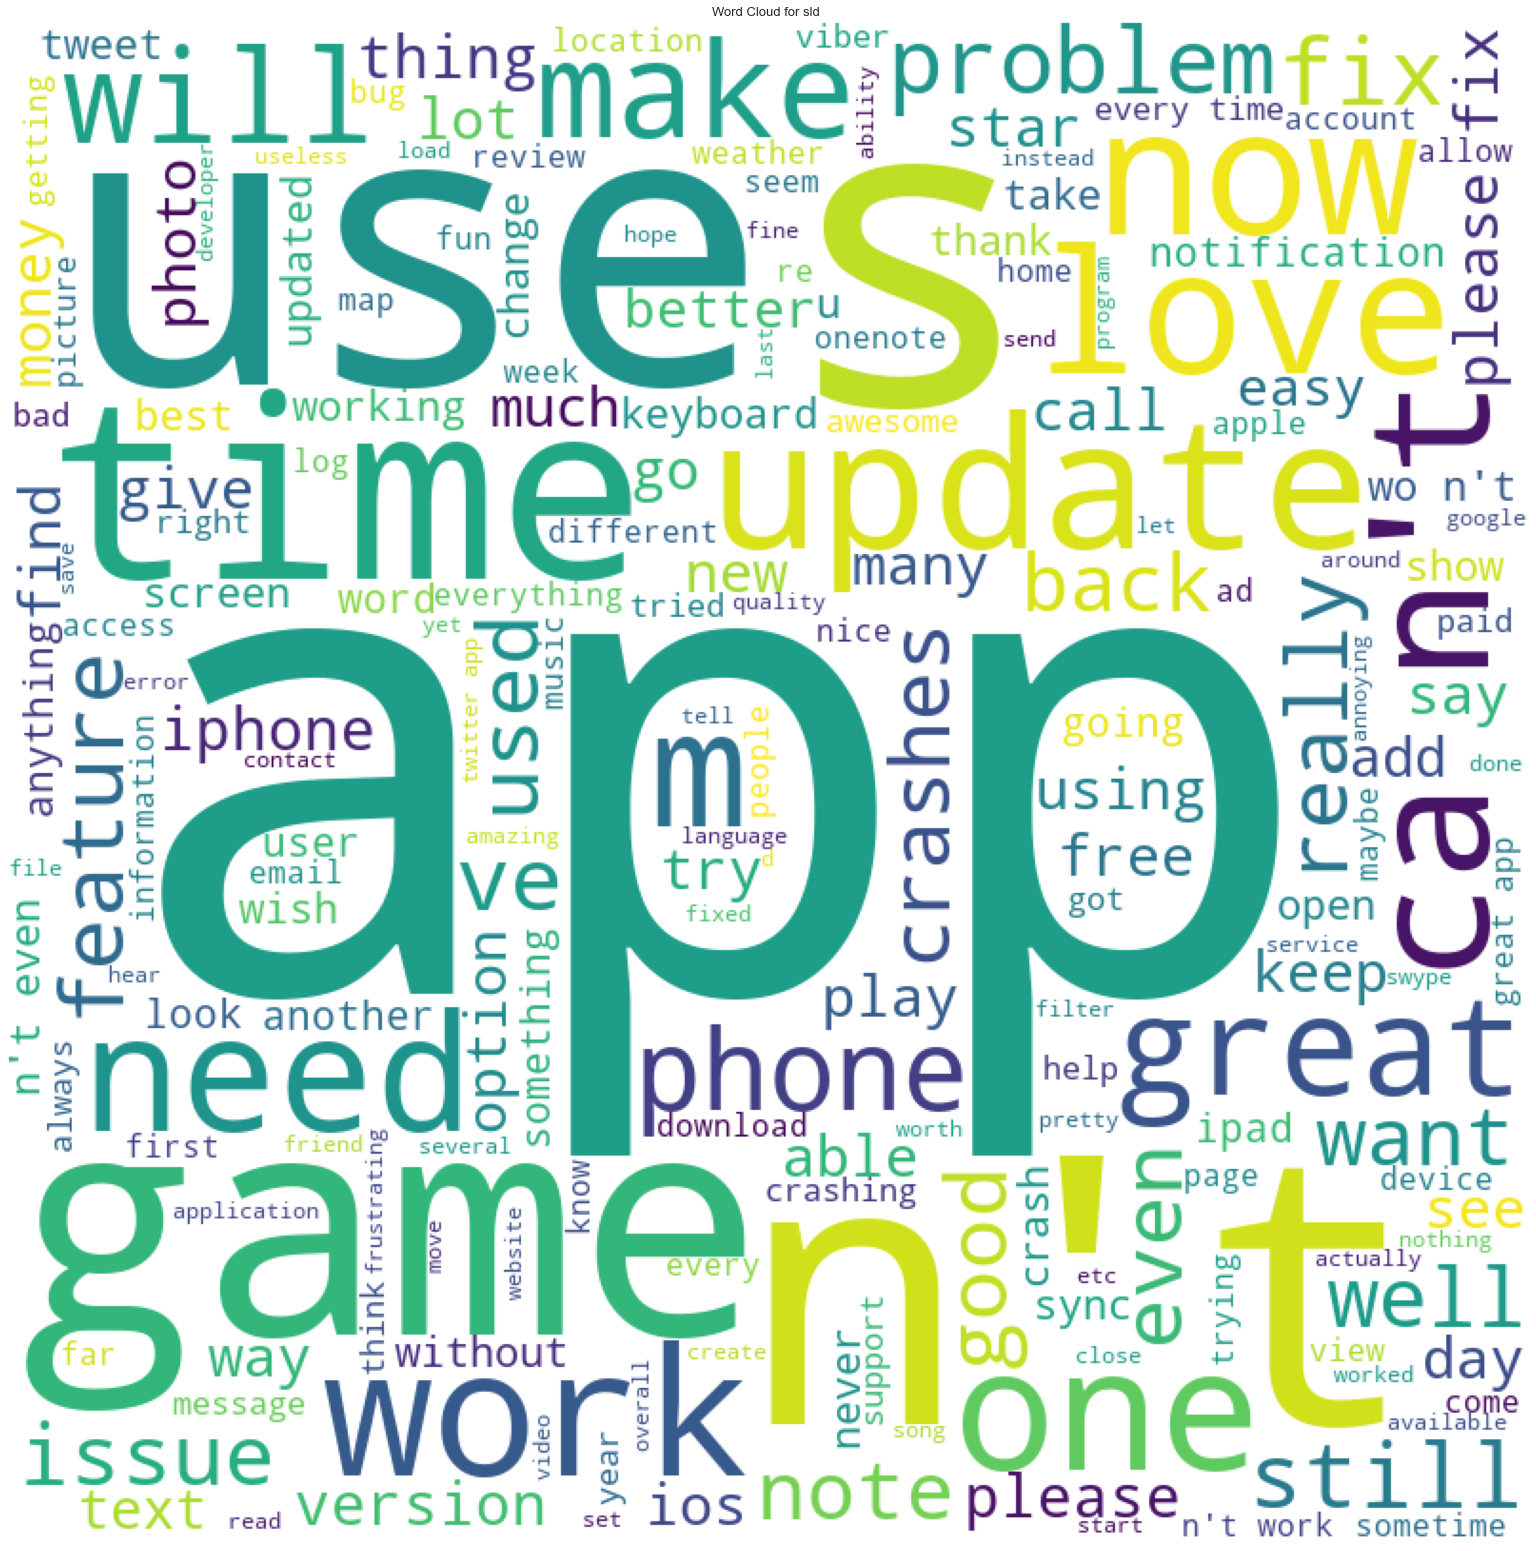

In [50]:
generate_word_cloud(useful)

## Useless reviews word cloud:

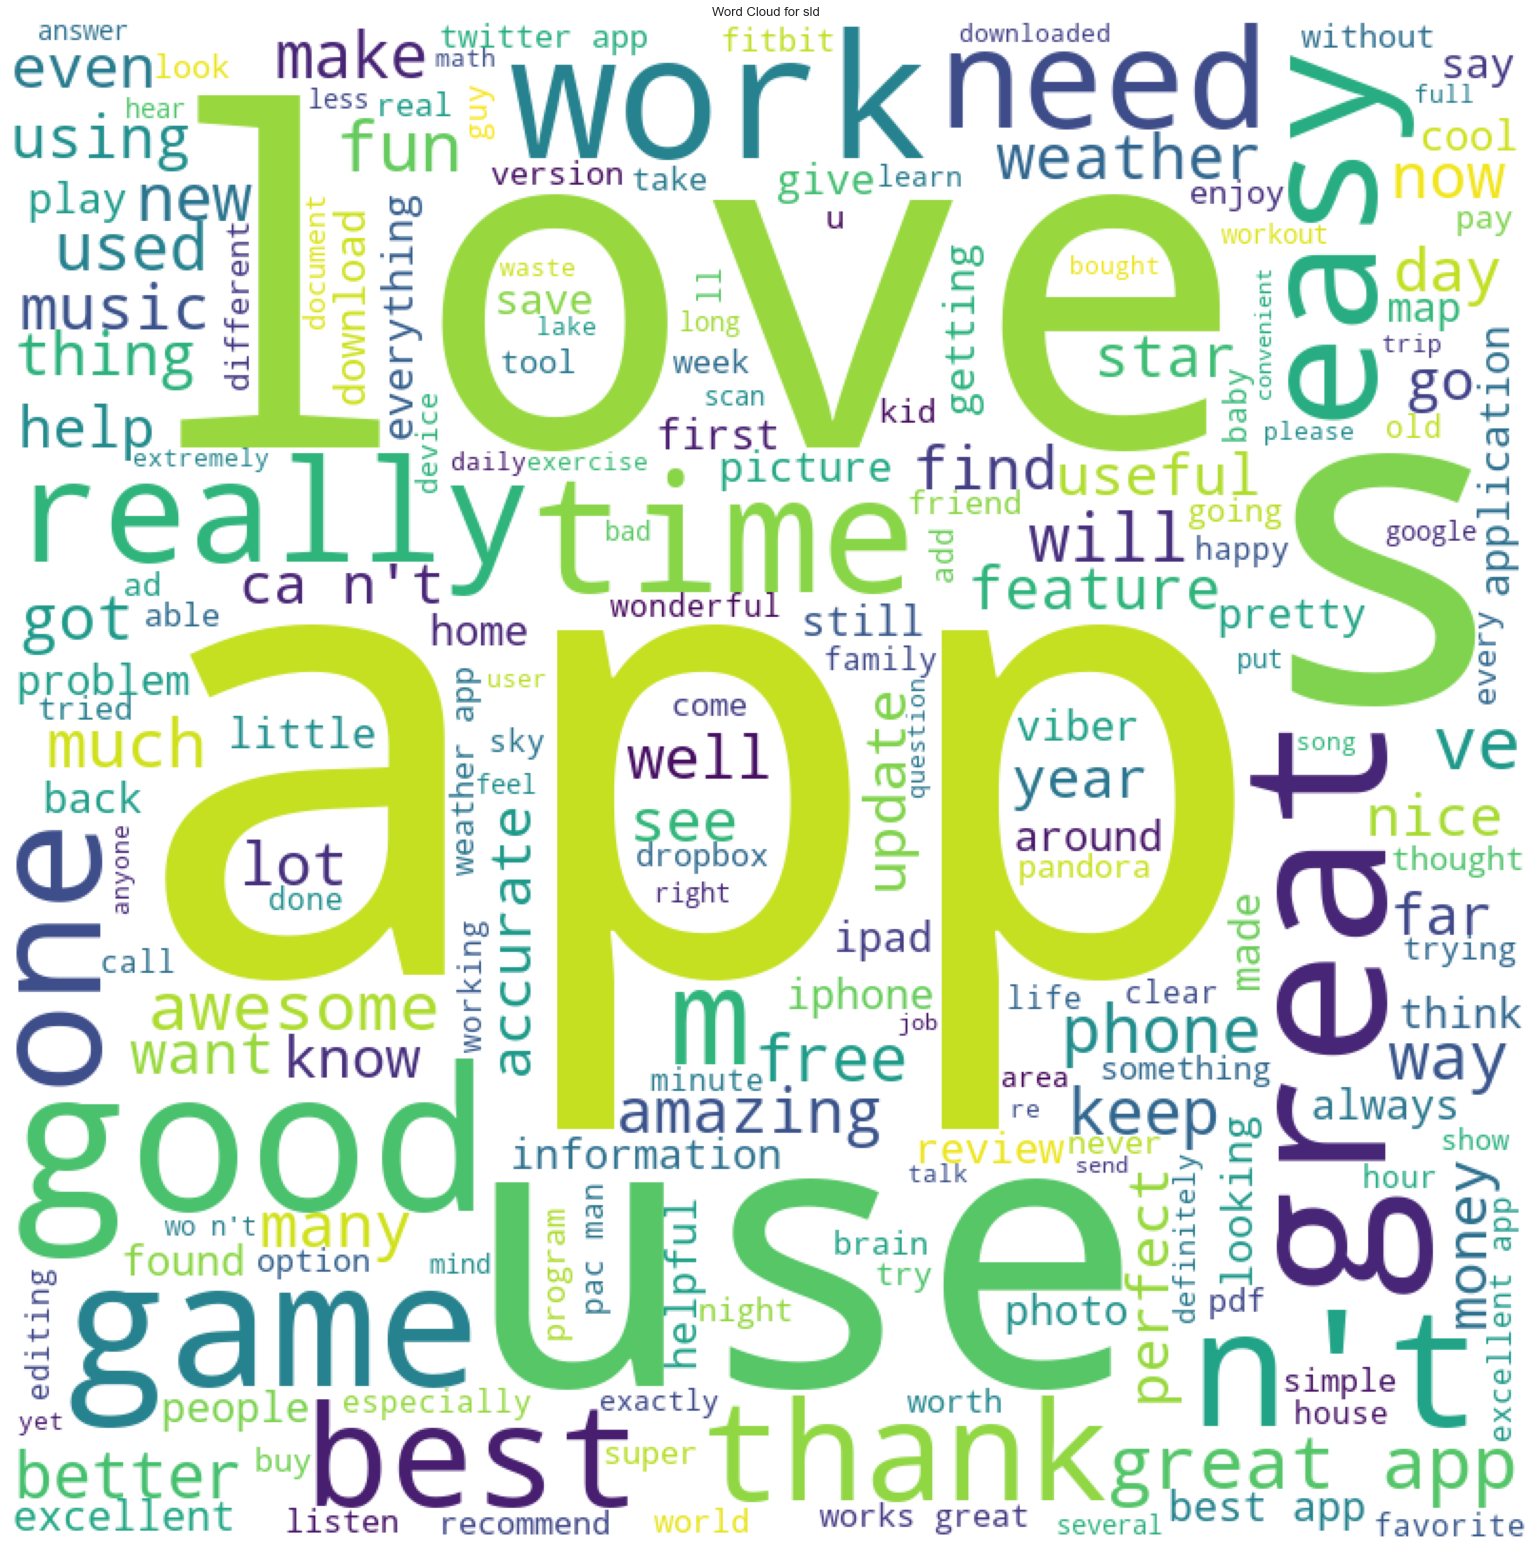

In [51]:
generate_word_cloud(useless)

# Capital letter count and examples

In [55]:
def count_upper_perc(s):
    count = 0
    for c in s:
        if c.isupper():
            count += 1
    return count / len(s.replace(" ", "")) # normalize over all non-whitespace characters

In [58]:
count_upper_perc("WHAT ARE YOU DOING?")

0.9375

Text(0.5, 1.0, 'Percentage of uppercase letters for useful reviews')

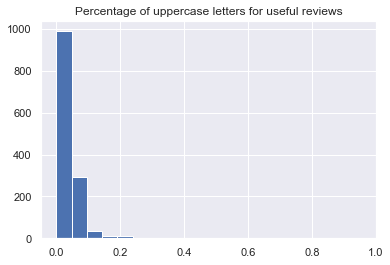

In [65]:
useful.reviews.apply(lambda x: count_upper_perc(x)).hist(bins=20)
plt.title("Percentage of uppercase letters for useful reviews")

Text(0.5, 1.0, 'Percentage of uppercase letters for useless reviews')

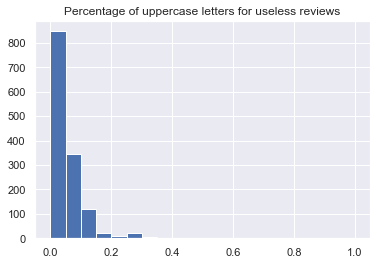

In [64]:
useless.reviews.apply(lambda x: count_upper_perc(x)).hist(bins=20)
plt.title("Percentage of uppercase letters for useless reviews")

# TF-IDF Words common to each class

## Useful

In [81]:
tfidf = TfidfVectorizer()
useful_tfidf = tfidf.fit_transform(useful.reviews).toarray()
feature_names = tfidf.get_feature_names_out ()
global_top10_idx = useful_tfidf.max(axis=0).argsort()[-50:]
np.asarray(feature_names)[global_top10_idx]

array(['refund', 'equalizer', 'notification', 'service', 'cueing',
       'heavy', 'answer', 'push', 'north', 'recognizing', 'protecting',
       'stupid', 'hate', 'stay', 'gifs', 'facebook', 'tracking',
       'perfectly', 'track', 's5', 'encrypted', '95', 'bugs', 'weekends',
       'big', 'cancel', 'sometimes', 'froze', 'loads', 'excellent',
       'credits', 'sign', 'lots', 'crap', 'crash', 'adds', 'iap',
       'improve', 'amounts', 'layout', 'detect', 'tongan', 'startup',
       'slow', 'sites', 'friendly', 'login', 'ios7', 'syncs', 'ilocano'],
      dtype=object)

## Useless

In [80]:
tfidf = TfidfVectorizer()
useless_tfidf = tfidf.fit_transform(useless.reviews).toarray()
feature_names = tfidf.get_feature_names_out ()
global_top10_idx = useless_tfidf.max(axis=0).argsort()[-50:]
np.asarray(feature_names)[global_top10_idx]

array(['alot', 'skype', 'best', 'like', 'try', 'pacman', 'speachless',
       'sometimes', '10', 'period', 'lectures', 'xyz', 'ylerps', 'ing',
       'versatile', 'slow', 'no', 'tweetnice', 'very', 'incredible',
       'alright', 'awesomeeeee', 'love', 'awesomeness', 'viber',
       'perfect', 'nice', 'fun', 'soon', 'tweetcaster', 'excellent', 'gn',
       'cool', 'fletes', 'amazing', 'hello', 'tnx', 'wonderful',
       'bestttt', 'ok', 'seamless', 'awesome', 'great', 'good',
       'fantastic', 'awsome', 'useful', 'poop', 'yes', 'a1'], dtype=object)